In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }

In [34]:
students = pd.read_csv("/Users/aytackolukisa/Desktop/Jupiter_Dosyaları/StudentsPerformance.csv")
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Soru - 1 )

Sınav sonuçları normal dağılımlı mıdır? Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz?

In [35]:
liste = list(students.columns)
liste

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

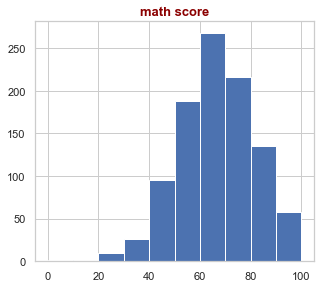

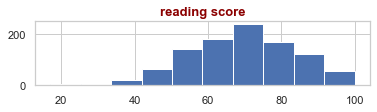

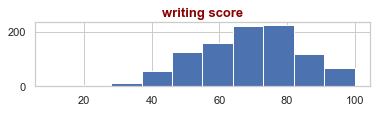

In [36]:
plt.figure(figsize = (5,15))

for i in range(3):
    plt.subplot(3,1,i+1)
    plt.hist(students[liste[i+5]])
    plt.title(liste[i+5],fontdict=baslik_font)
    plt.show()

Görünüşte normal dağılıma sahipler ama biz daha iyisini logaritmik dönüşüm uygularasak bulabilirmisyiz buna bakalım

Değişkenler yeterince normal dağılım gösteriyor logaritmik dağılıma gerek yok

In [37]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["math score", "reading score", "writing score"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera((students[ozellik]))
    norm_stats = normaltest((students[ozellik]))
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,math score,15.91226,0.00035,15.40896,0.00045
1,reading score,11.38330,0.00337,11.11741,0.00385
2,writing score,13.98509,0.00092,13.60645,0.00111


İstatistik olarakte normal dağılım içerisinde olduğunu kanıtladık.

### SORU 2-)
Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin.

In [38]:
students["ortalama"] = (students["math score"]+students["reading score"]+students["writing score"])/3
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,ortalama
0,female,group B,bachelor's degree,standard,none,72,72,74,72.66667
1,female,group C,some college,standard,completed,69,90,88,82.33333
2,female,group B,master's degree,standard,none,90,95,93,92.66667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33333
4,male,group C,some college,standard,none,76,78,75,76.33333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00000
996,male,group C,high school,free/reduced,none,62,55,55,57.33333
997,female,group C,high school,free/reduced,completed,59,71,65,65.00000
998,female,group D,some college,standard,completed,68,78,77,74.33333


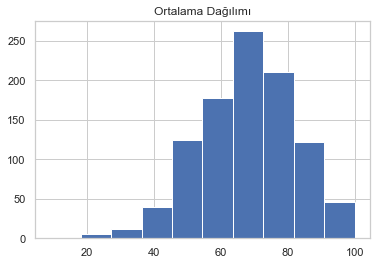

In [39]:
plt.hist(students["ortalama"])
plt.title("Ortalama Dağılımı")
plt.show()

In [40]:
pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["ortalama"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera((students[ozellik]))
    norm_stats = normaltest((students[ozellik]))
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,ortalama,15.45339,0.00044,15.18672,0.00050


Normal dağılım gerçekleştirilmiş


### SORU 3-)
Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

In [42]:
students.corr()

,math score,reading score,writing score,ortalama
math score,1.00000,0.81758,0.80264,0.91875
reading score,0.81758,1.00000,0.95460,0.97033
writing score,0.80264,0.95460,1.00000,0.96567
ortalama,0.91875,0.97033,0.96567,1.00000


<AxesSubplot:>

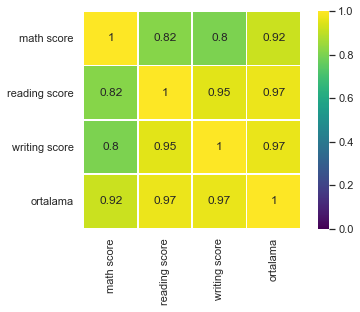

In [43]:
sns.heatmap(students.corr(),square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')

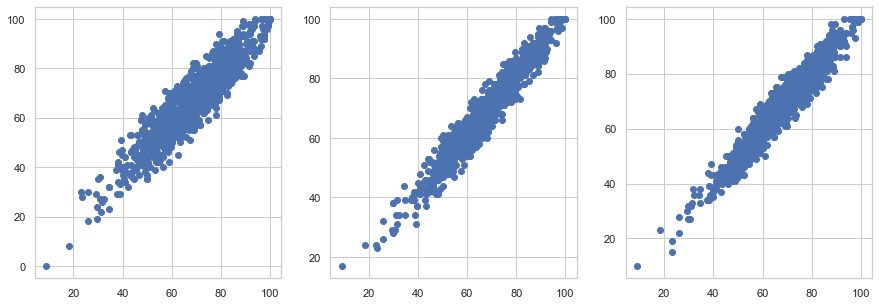

In [47]:
plt.figure(figsize = (15,5))
for i in range(3):
    liste = ["math score","reading score","writing score"]
    plt.subplot(1,3,i+1)
    plt.scatter(students["ortalama"],students[liste[i]])

Üç değişkende hedef değişken ile son derece uyumlu çalışmaktadır. Koreslasyon haritasıda scatter dağılımda üç değişkenin üçünüde hedef değişkenimizin içinde tutmamız gerektiğini bizlere söylyor.